Рекурентна нейронна мережа RNN

In [14]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D, Input

Встановлення гіперпараметрів:


In [3]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 256
embedding_dim = 32
units = 32

Завантаження даних:


In [4]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Передпроцесинг послідовних даних:


In [5]:

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

Побудова та компіляція моделі




In [15]:

model = Sequential()

model.add(Input(shape=(maxlen,)))


model.add(Embedding(input_dim=max_features, output_dim=embedding_dim))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(units=units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Навчання моделі


In [6]:
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - acc: 0.5238 - loss: 0.6910 - val_acc: 0.5533 - val_loss: 0.6802
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - acc: 0.6331 - loss: 0.6490 - val_acc: 0.6673 - val_loss: 0.6033
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - acc: 0.7468 - loss: 0.5290 - val_acc: 0.7429 - val_loss: 0.5296
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - acc: 0.8291 - loss: 0.4064 - val_acc: 0.8283 - val_loss: 0.4091
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - acc: 0.8628 - loss: 0.3377 - val_acc: 0.8399 - val_loss: 0.3827
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - acc: 0.8794 - loss: 0.2981 - val_acc: 0.8491 - val_loss: 0.3691
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - acc: 0.9081 - loss: 0.2374 - val_acc: 0.8452 - val_loss: 0.3821
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - acc: 0.9185 - loss: 0.2168 - val_acc: 0.7756 - val_loss: 0.5137
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - 

Візуалізація результатів


In [7]:
def visualisation(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
    plt.title('Точність тренування і валідації')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
    plt.title('Втрати тренування і валідації')
    plt.legend()

    plt.show()

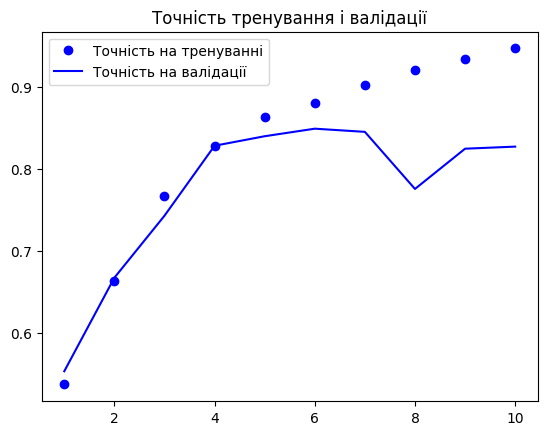

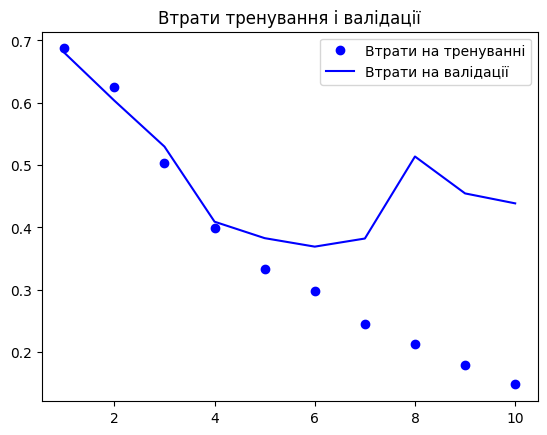

In [8]:
visualisation(history)


Використання моделі


In [9]:
def prediction(model):
    predictions = model.predict(input_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

In [10]:
prediction(model)


782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - acc: 0.8293 - loss: 0.4465
Test Loss: 0.4421670436859131
Test Accuracy: 0.8288800120353699


**Побудова моделі LSTM**


In [7]:
from keras.layers import LSTM


Побудова та компіляція моделі


In [16]:
model2 = Sequential()

model2.add(Input(shape=(maxlen,)))


model2.add(Embedding(input_dim=max_features, output_dim=embedding_dim))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

In [17]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_5                  │ (None, 500, 32)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Навчання та візуалізація моделі


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 71s 935ms/step - acc: 0.5444 - loss: 0.6894 - val_acc: 0.6823 - val_loss: 0.6445
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 78s 940ms/step - acc: 0.7079 - loss: 0.6052 - val_acc: 0.7655 - val_loss: 0.5059
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 81s 927ms/step - acc: 0.7822 - loss: 0.4916 - val_acc: 0.8091 - val_loss: 0.4218
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 929ms/step - acc: 0.8168 - loss: 0.4245 - val_acc: 0.8203 - val_loss: 0.3988
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 926ms/step - acc: 0.8431 - loss: 0.3758 - val_acc: 0.7992 - val_loss: 0.4406
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 916ms/step - acc: 0.8586 - loss: 0.3481 - val_acc: 0.8240 - val_loss: 0.3891
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 942ms/step - acc: 0.8667 - loss: 0.3286 - val_acc: 0.8297 - val_loss: 0.3862
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 81s 925ms/step - acc: 0.8726 - loss: 0.3150 - val_acc: 0.7836 - val_loss: 0.5446
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 932ms/

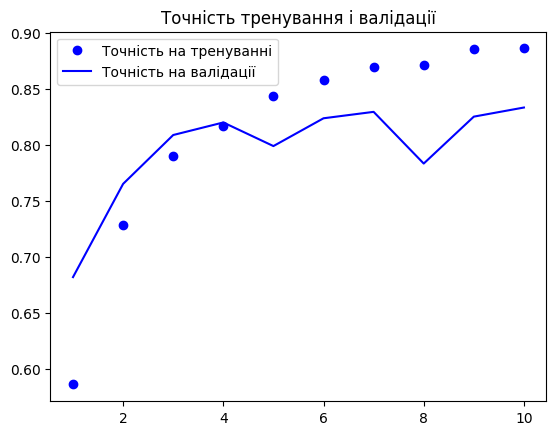

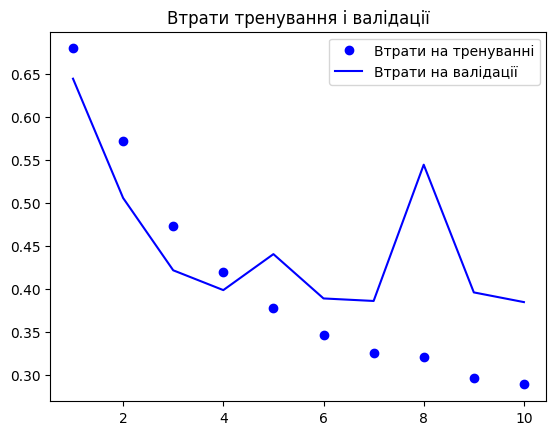

In [14]:
history2 = model2.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history2)

Прогнозування з використанням навченої моделі


In [15]:
prediction(model2)


782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 203ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 160s 205ms/step - acc: 0.8320 - loss: 0.3800
Test Loss: 0.3748035132884979
Test Accuracy: 0.8352000117301941


**Побудова моделі BRNN**

In [18]:
from keras.layers import Bidirectional

Побудова та компіляція моделі


In [20]:
model3 = Sequential()

model3.add(Input(shape=(maxlen,)))
model3.add(Embedding(input_dim=max_features, output_dim=embedding_dim))
model3.add(SpatialDropout1D(0.2))
model3.add(Bidirectional(LSTM(32, dropout=0.2)))
model3.add(Dense(1, activation='sigmoid'))

In [21]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_7                  │ (None, 500, 32)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336,705 (1.28 MB)

 Trainable params: 336,705 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Навчання та візуалізація моделі


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - acc: 0.5053 - loss: 0.6930 - val_acc: 0.5227 - val_loss: 0.6884
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - acc: 0.6080 - loss: 0.6631 - val_acc: 0.7788 - val_loss: 0.5256
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - acc: 0.7598 - loss: 0.5217 - val_acc: 0.8095 - val_loss: 0.4229
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - acc: 0.8283 - loss: 0.4163 - val_acc: 0.8471 - val_loss: 0.3733
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.8526 - loss: 0.3675 - val_acc: 0.8323 - val_loss: 0.3832
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - acc: 0.8546 - loss: 0.3511 - val_acc: 0.8436 - val_loss: 0.3649
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - acc: 0.8638 - loss: 0.3410 - val_acc: 0.8547 - val_loss: 0.3449
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.8845 - loss: 0.2924 - val_acc: 0.8683 - val_loss: 0.3443
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - acc: 0.8914

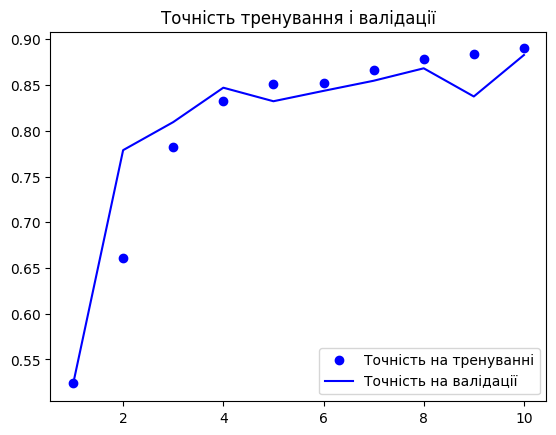

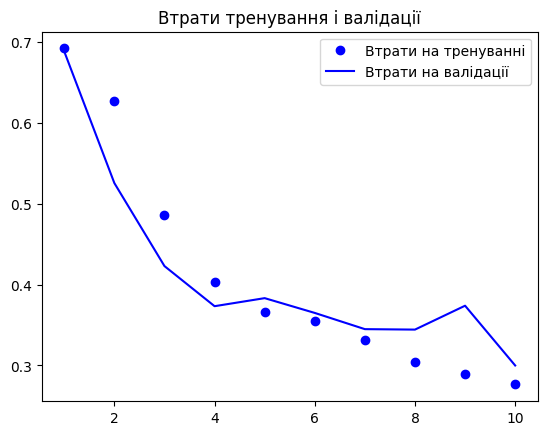

In [19]:
history3 = model3.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history3)

Прогнозування з використанням навченої моделі

In [20]:
prediction(model3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.8760 - loss: 0.3103
Test Loss: 0.3105347454547882
Test Accuracy: 0.8757200241088867


**Побудова моделі DRNN**


Побудова та компіляція моделі

In [23]:
model4 = Sequential()

model4.add(Input(shape=(maxlen,)))
model4.add(Embedding(input_dim=max_features, output_dim=embedding_dim))
model4.add(SpatialDropout1D(0.2))

model4.add(Bidirectional(LSTM(32, dropout=0.2, return_sequences=True)))
model4.add(Bidirectional(LSTM(32, dropout=0.2)))

model4.add(Dense(1, activation='sigmoid'))

In [24]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model4.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_8                  │ (None, 500, 32)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 500, 64)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,537 (1.38 MB)

 Trainable params: 361,537 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Навчання та візуалізація моделі


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - acc: 0.5132 - loss: 0.6925 - val_acc: 0.5625 - val_loss: 0.6753
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - acc: 0.6680 - loss: 0.6178 - val_acc: 0.7792 - val_loss: 0.4856
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - acc: 0.7901 - loss: 0.4671 - val_acc: 0.7924 - val_loss: 0.4539
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - acc: 0.8299 - loss: 0.3920 - val_acc: 0.8280 - val_loss: 0.3998
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - acc: 0.8567 - loss: 0.3568 - val_acc: 0.8580 - val_loss: 0.3397
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - acc: 0.8723 - loss: 0.3206 - val_acc: 0.8244 - val_loss: 0.4164
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - acc: 0.8755 - loss: 0.3110 - val_acc: 0.8404 - val_loss: 0.3837
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - acc: 0.8823 - loss: 0.2929 - val_acc: 0.8604 - val_loss: 0.3434
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - acc: 0

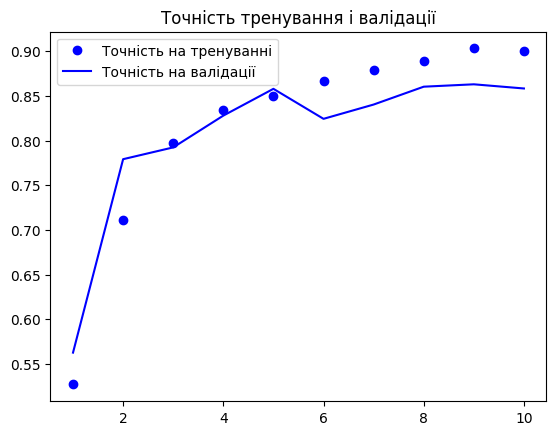

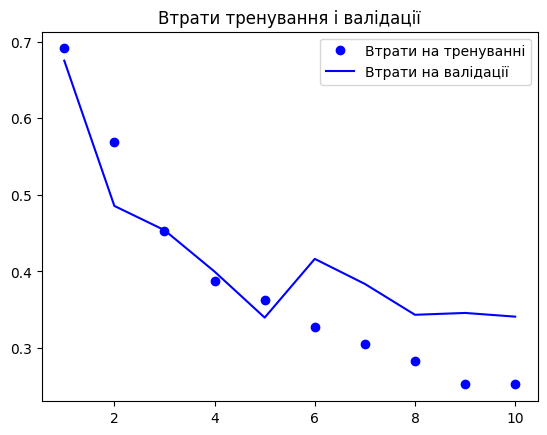

In [23]:
history4 = model4.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history4)

Прогнозування з використанням навченої моделі


In [24]:
prediction(model4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - acc: 0.8593 - loss: 0.3400
Test Loss: 0.3356996476650238
Test Accuracy: 0.8613600134849548


Графіки


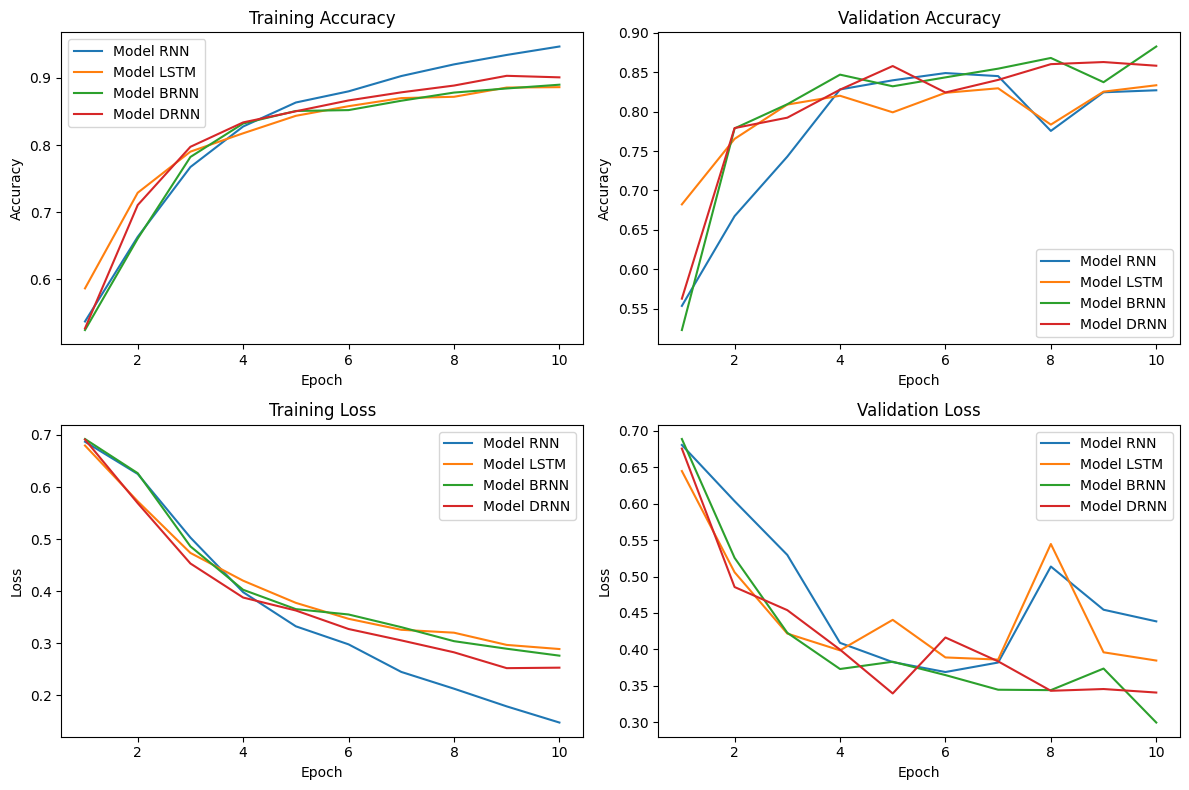

In [25]:
epochs = range(1, len(history.history['acc']) + 1)
epochs2 = range(1, len(history2.history['acc']) + 1)
epochs3 = range(1, len(history3.history['acc']) + 1)
epochs4 = range(1, len(history4.history['acc']) + 1)

# Створення сітки графіків 2x2
plt.figure(figsize=(12, 8))

# Графік 1: Точність на тренувальних данних
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['acc'], label='Model RNN')
plt.plot(epochs2, history2.history['acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['acc'], label='Model DRNN')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 2: Точність на валідаційних данних
plt.subplot(2, 2, 2)
plt.plot(epochs, history.history['val_acc'], label='Model RNN')
plt.plot(epochs2, history2.history['val_acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_acc'], label='Model DRNN')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 3: Втрати на тренувальних данних
plt.subplot(2, 2, 3)
plt.plot(epochs, history.history['loss'], label='Model RNN')
plt.plot(epochs2, history2.history['loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['loss'], label='Model DRNN')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Графік 4: Втрати на валідаційних данних
plt.subplot(2, 2, 4)
plt.plot(epochs, history.history['val_loss'], label='Model RNN')
plt.plot(epochs2, history2.history['val_loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_loss'], label='Model DRNN')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Висновки:**

Ми побудували 4 моделі, показники яких на тестових даних подані у таблиці:


---


Модель Точність 	Втрати


---


RNN	  82.88%	 44.21%

LSTM	 83.52% 	37.48%

BRNN	 87.57% 	31.05%

DBRR	 86.13% 	33.57%


---





Згідно з результатами, найефективнішою моделлю для даної задачі класифікації є BRNN з точністю 87.57% і найнижчими втратами (31.05%). Ця модель забезпечує оптимальне поєднання точності та здатності узагальнювати, завдяки своїй архітектурі, що враховує обидва напрямки контексту в послідовності. Моделі LSTM та DBRR також показали хороші результати і можуть бути корисними в залежності від специфіки задачі, але BRNN виглядає як найкращий вибір для цієї конкретної ситуації.